# CNN for classification of CIFAR-10 dataset

## Imports and dataset loading

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

m = x_train.shape[0]
num_classes = 10

print('x_train shape:', x_train.shape)
print(m, 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Dataset visualization

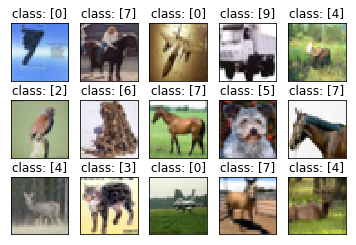

In [3]:
nrows, ncols = 3, 5
idx = np.random.choice(m, nrows * ncols)
fig = plt.figure()
for i in range(1, nrows * ncols +1):
    fig.add_subplot(nrows, ncols, i)
    plt.imshow(x_train[idx[i-1]])
    plt.title(f'class: {y_train[idx[i-1]]}')
    plt.xticks([])
    plt.yticks([])


## The model

In [4]:
input_shape = x_train.shape[1:]

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dens

## Data normalization and encoding
Normalizes the RGB values of the input to [0,1] interval and encodes the output classes to a 10 dimensional 1-hot vector.

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Model training
Note that the validation is done with the test data. This is bad practice.

In [6]:
batch_size = 100
epochs = 5

model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    shuffle=True
)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 6s 111us/step - loss: 1.9377 - acc: 0.3250 - val_loss: 1.7197 - val_acc: 0.4089
Epoch 2/5
50000/50000 [==============================] - 3s 67us/step - loss: 1.6378 - acc: 0.4315 - val_loss: 1.5552 - val_acc: 0.4581
Epoch 3/5
50000/50000 [==============================] - 3s 67us/step - loss: 1.5131 - acc: 0.4729 - val_loss: 1.4741 - val_acc: 0.4764
Epoch 4/5
50000/50000 [==============================] - 3s 67us/step - loss: 1.4318 - acc: 0.5028 - val_loss: 1.4021 - val_acc: 0.5114
Epoch 5/5
50000/50000 [==============================] - 3s 67us/step - loss: 1.3687 - acc: 0.5251 - val_loss: 1.3498 - val_acc: 0.5305


## Model testing
Evaluate the model in unseen data.

In [7]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
for i, score in enumerate(scores):
    print(f'Test {model.metrics_names[i]}: {score}')

10000/10000 [==============================] - 0s 49us/step
Test loss: 1.3498251876831056
Test acc: 0.5305
